# Sentiment Analysis

Library Import

In [11]:
import numpy as np
import pandas as pd
import nltk
import string
import numbers
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [2]:
dataset_path = "Tweets.csv"
twitter_sentiment_analysis_df = pd.read_csv(dataset_path)
twitter_sentiment_analysis_df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
text_field = "text"
airline_sentiment_field = "airline_sentiment"

In [4]:
twitter_sentiment_analysis_required_fields_df = twitter_sentiment_analysis_df[[text_field, airline_sentiment_field]]
twitter_sentiment_analysis_required_fields_df

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


## Data Visualization

See class distributions

<AxesSubplot:xlabel='airline_sentiment', ylabel='Count'>

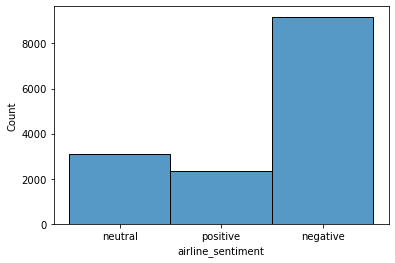

In [14]:
sns.histplot(twitter_sentiment_analysis_required_fields_df[airline_sentiment_field])

Word Count

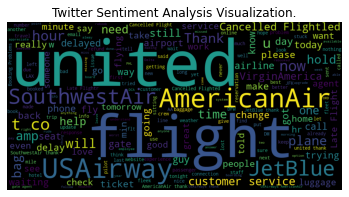

In [7]:
def visualize_word_cloud(documents, title, width, height):
    word_cloud = WordCloud(width = width, height = height, random_state = 100)
    text_from_all_documents = " ".join(documents)
    word_cloud.generate(text_from_all_documents)

    plt.title(title)
    plt.axis("off")
    plt.imshow(word_cloud)
    plt.show()

visualize_word_cloud(twitter_sentiment_analysis_required_fields_df[text_field], "Twitter Sentiment Analysis Visualization.", 1000, 500)